### Command for bulding the localy cloned package

install the package in editable mode (command needs to be copied to the terminal - doens't work in notebook becuase paths or something ¯\_(ツ)_/¯)

""" pip install -e . """

In [6]:
import sys
print(sys.path)

['/Users/blazpridgar/Documents/GitHub/normalizing-flows-fork/notebooks', '/Users/blazpridgar/Documents/GitHub/normalizing-flows-fork/.conda/lib/python310.zip', '/Users/blazpridgar/Documents/GitHub/normalizing-flows-fork/.conda/lib/python3.10', '/Users/blazpridgar/Documents/GitHub/normalizing-flows-fork/.conda/lib/python3.10/lib-dynload', '', '/Users/blazpridgar/Documents/GitHub/normalizing-flows-fork/.conda/lib/python3.10/site-packages', '/Users/blazpridgar/Documents/GitHub/normalizing-flows-fork']


In [7]:
sys.path.append("path/to/normalizing-flows-fork")

### Example

In [1]:
import torch
from normalizing_flows.flows import Flow, PrincipalManifoldFlow
from normalizing_flows.bijections import RealNVP
# from torch.autograd.functional import vjp

In [17]:
# Create some synthetic training and validation data
torch.manual_seed(0)

event_shape = (10,)
n_train = 100
n_val = 20
n_test = 10000

x_train = torch.randn(n_train, *event_shape) * 2 + 4
x_val = torch.randn(n_val, *event_shape) * 2 + 4
x_test = torch.randn(n_test, *event_shape) * 2 + 4

x_one_dimensional = torch.randn(event_shape) * 2 + 4

In [ ]:
# Train without validation data
torch.manual_seed(0)
flow0 = PrincipalManifoldFlow(RealNVP(event_shape, n_layers=5), debug=False)
flow0.fit(x_train, show_progress=True)

In [6]:
# Train with validation data and keep the best weights
torch.manual_seed(0)
flow1 = PrincipalManifoldFlow(RealNVP(event_shape, n_layers=5))
flow1.fit(x_train, show_progress=True, x_val=x_val)

Fitting Principal Manifold Flow:   0%|          | 0/500 [00:00<?, ?it/s]

Fitting Principal Manifold Flow: 100%|██████████| 500/500 [00:11<00:00, 43.98it/s, Training loss (batch): 8738.1025, Validation loss: 65.9434]  


In [7]:
# Train with validation data, early stopping, and keep the best weights
torch.manual_seed(0)
flow2 = PrincipalManifoldFlow(RealNVP(event_shape, n_layers=5))
flow2.fit(x_train, show_progress=True, x_val=x_val, early_stopping=True)

Fitting Principal Manifold Flow:  12%|█▏        | 61/500 [00:01<00:08, 54.70it/s, Training loss (batch): 4498.6338, Validation loss: 49.4349] 


In [8]:
print("Test loss values")
print()
print(f"Without validation data: {torch.mean(-flow0.log_prob(x_test))}")
print(f"With validation data, no early stopping: {torch.mean(-flow1.log_prob(x_test))}")
print(f"With validation data, early stopping: {torch.mean(-flow2.log_prob(x_test))}")

Test loss values

Without validation data: 82.03611755371094
With validation data, no early stopping: 35.10798645019531
With validation data, early stopping: 35.10798645019531


### SHAPES EXPERIMENT

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '../')

from test.shapes import *

sys.path.remove('../')

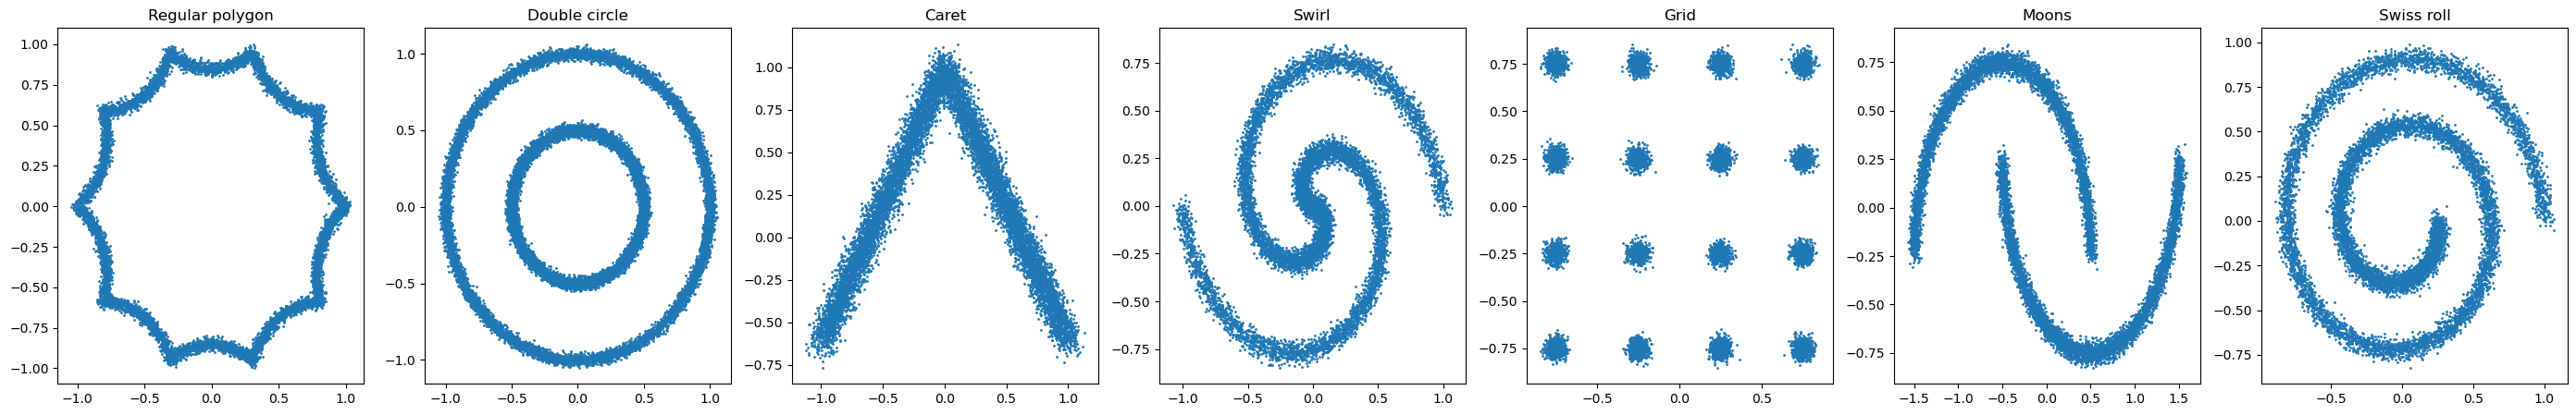

In [3]:
num_points = 10000

data_regular_polygon = n_regular_polygon(n=10, radius=1, angle=0, arc_height=0.1, num_points=num_points, noise_std=0.02, seed=0)
data_double_circle = double_circle(num_points=num_points, radius1=1.0, radius2=0.5, noise_std=0.02, seed=0)
data_caret = caret(line_length=2, angle=45, num_points=num_points, noise_std=0.05, seed=0)
data_swirl = swirl(radius=1, angle=0, num_points=num_points, noise_std=0.03, seed=0)
data_grid = grid(n=4, dist=(0.5, 0.5), num_points=num_points, noise_std=0.03, seed=0)
data_moons = moons(radius=1, angle=0, shift=None, num_points=num_points, noise_std=0.03, seed=0)
data_swiss_roll = swiss_roll(radius1=1, radius2=0.25, num_revolutions=2, num_points=num_points, noise_std=0.03, seed=0)


# Plotting the generated points
ax, fig = plt.subplots(1, 7, figsize=(35, 5))
fig[0].scatter(data_regular_polygon[0], data_regular_polygon[1], s=1)
fig[0].set_title("Regular polygon")
fig[1].scatter(data_double_circle[0], data_double_circle[1], s=1)
fig[1].set_title("Double circle")
fig[2].scatter(data_caret[0], data_caret[1], s=1)
fig[2].set_title("Caret")
fig[3].scatter(data_swirl[0], data_swirl[1], s=1)
fig[3].set_title("Swirl")
fig[4].scatter(data_grid[0], data_grid[1], s=1)
fig[4].set_title("Grid")
fig[5].scatter(data_moons[0], data_moons[1], s=1)
fig[5].set_title("Moons")
fig[6].scatter(data_swiss_roll[0], data_swiss_roll[1], s=1)
fig[6].set_title("Swiss roll")
plt.show()

In [4]:
# prepare the data
data_tensor = torch.tensor(np.stack(data_swirl, axis=1)).float()  # Create a tensor from the data
n_dim = 2

In [5]:
torch.manual_seed(0)
normal_flow = Flow(RealNVP(n_dim, n_layers=10))
normal_flow.fit(data_tensor, show_progress=True)

Fitting NF:  52%|█████▏    | 262/500 [01:22<01:21,  2.91it/s, Training loss (batch): -0.0253]

In [ ]:
torch.manual_seed(0)
PM_flow = PrincipalManifoldFlow(RealNVP(n_dim, n_layers=10))
PM_flow.fit(data_tensor, show_progress=True)

Fitting Principal Manifold Flow:   0%|          | 0/500 [00:00<?, ?it/s]

Fitting Principal Manifold Flow: 100%|██████████| 500/500 [03:18<00:00,  2.52it/s, Training loss (batch): 26.3195]


Comparison of new datapoint generation of both flows.

Text(0.5, 1.0, 'PF flow')

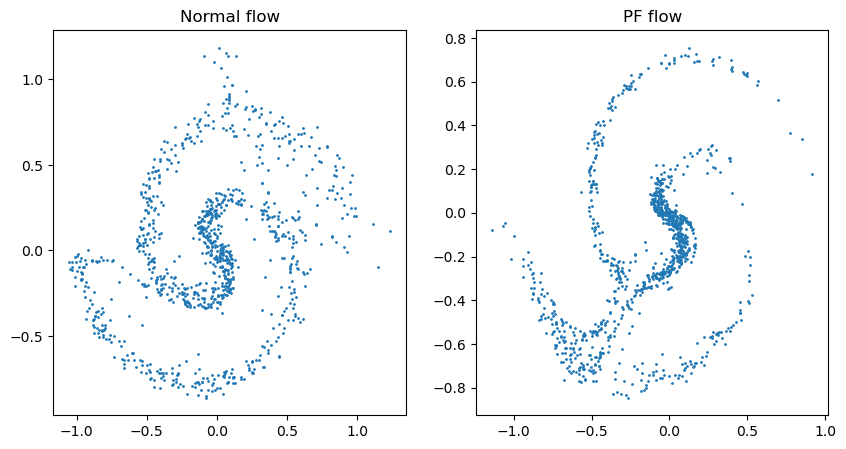

In [ ]:
x_new_normal = normal_flow.sample(1000).detach().numpy()  # Sample 1000 new data points
x_new_PM = PM_flow.sample(1000).detach().numpy()  # Sample 1000 new data points

# plot new data of both flows (using subplots)
ax, fig = plt.subplots(1, 2, figsize=(10, 5))
fig[0].scatter(x_new_normal[:, 0], x_new_normal[:, 1], s=1)
fig[0].set_title("Normal flow")
fig[1].scatter(x_new_PM[:, 0], x_new_PM[:, 1], s=1)
fig[1].set_title("PF flow")

In [ ]:
# save the plot
plt.savefig("plots/output_10k_sum.png")

Comparison of the contours created by both flows.

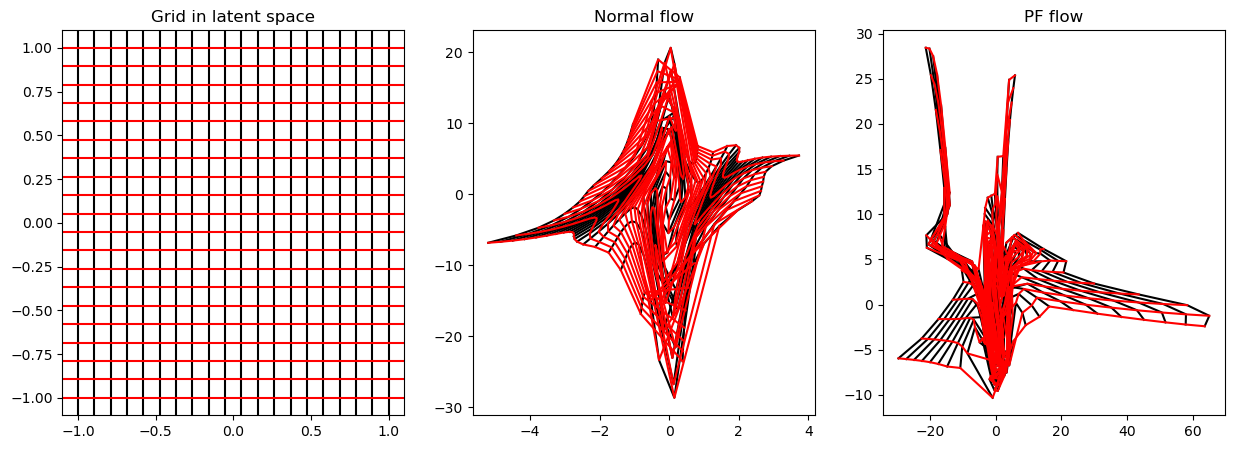

In [15]:
x_min, x_max = -1, 1
y_min, y_max = -1, 1
x_tick, y_tick = 20, 20
grid_points = generate_grid_data([x_min, x_max], [y_min, y_max], x_tick, y_tick)

# transform grid points
transformed_grid_points_normal = normal_flow.bijection(grid_points)[0].detach().numpy()
transformed_grid_points_PM = PM_flow.bijection(grid_points)[0].detach().numpy()

# plot grid_points as grid with vertical lines being black and horizontal lines being red
ax, fig = plt.subplots(1, 3, figsize=(15, 5))
for i in range(x_tick):
    fig[0].axvline(x=grid_points[i*y_tick,0], color='black')
    fig[1].plot(transformed_grid_points_normal[i*y_tick:i*y_tick+y_tick,0], transformed_grid_points_normal[i*y_tick:i*y_tick+y_tick,1], color='black')
    fig[2].plot(transformed_grid_points_PM[i*y_tick:i*y_tick+y_tick,0], transformed_grid_points_PM[i*y_tick:i*y_tick+y_tick,1], color='black')
for i in range(y_tick):
    fig[0].axhline(y=grid_points[i,1], color='red')
    fig[1].plot(transformed_grid_points_normal[i::y_tick,0], transformed_grid_points_normal[i::y_tick,1], color='red')
    fig[2].plot(transformed_grid_points_PM[i::y_tick,0], transformed_grid_points_PM[i::y_tick,1], color='red')

# add titles
fig[0].set_title("Grid in latent space")
fig[1].set_title("Normal flow")
fig[2].set_title("PF flow")

plt.show()


### Example case for understanding dimensions

In [ ]:
# create 1 d tensor data
z = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=torch.float32)

print(z.shape)
print(z.shape[-1])

# create 2 d tensor data
zz = torch.tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], dtype=torch.float32)

print(zz.shape)
print(zz.shape[-1])

torch.Size([10])
10
torch.Size([2, 10])
10
